<a href="https://colab.research.google.com/github/nptikiran/Linkedin_Google_ProfileScraper/blob/main/ARIMA_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(9,7),'figure.dpi':120})

In [ ]:
df = pd.read_csv('wwwusage.csv', names=['value'],header=0)

In [ ]:
df.head()

,value
0,88
1,84
2,85
3,85
4,84


In [ ]:
# Dicky fuller test to check stationarity
result = adfuller(df.value.dropna())
print('ADF statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF statistic: -2.464240
p-value: 0.124419


P value id greater than 0.05 so it is non stationary. To make it stationary we have to differentiate it.

In [ ]:
df1 = pd.DataFrame({'a':[1,2,3,4,5,6],
                   'b':[1,1,2,3,5,8],
                   'c':[1,4,9,16,25,36]})
df1

,a,b,c
0,1,1,1
1,2,1,4
2,3,2,9
3,4,3,16
4,5,5,25
5,6,8,36


In [ ]:
df1.diff()

,a,b,c
0,NaN,NaN,NaN
1,1.0,0.0,3.0
2,1.0,1.0,5.0
3,1.0,1.0,7.0
4,1.0,2.0,9.0
5,1.0,3.0,11.0


In [ ]:
#differantiate with previous one ro
df1.diff(axis=0,periods=1)

,a,b,c
0,NaN,NaN,NaN
1,1.0,0.0,3.0
2,1.0,1.0,5.0
3,1.0,1.0,7.0
4,1.0,2.0,9.0
5,1.0,3.0,11.0


In [ ]:
#differantiate with previous three rows
df1.diff(periods=3)

,a,b,c
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,3.0,2.0,15.0
4,3.0,4.0,21.0
5,3.0,6.0,27.0


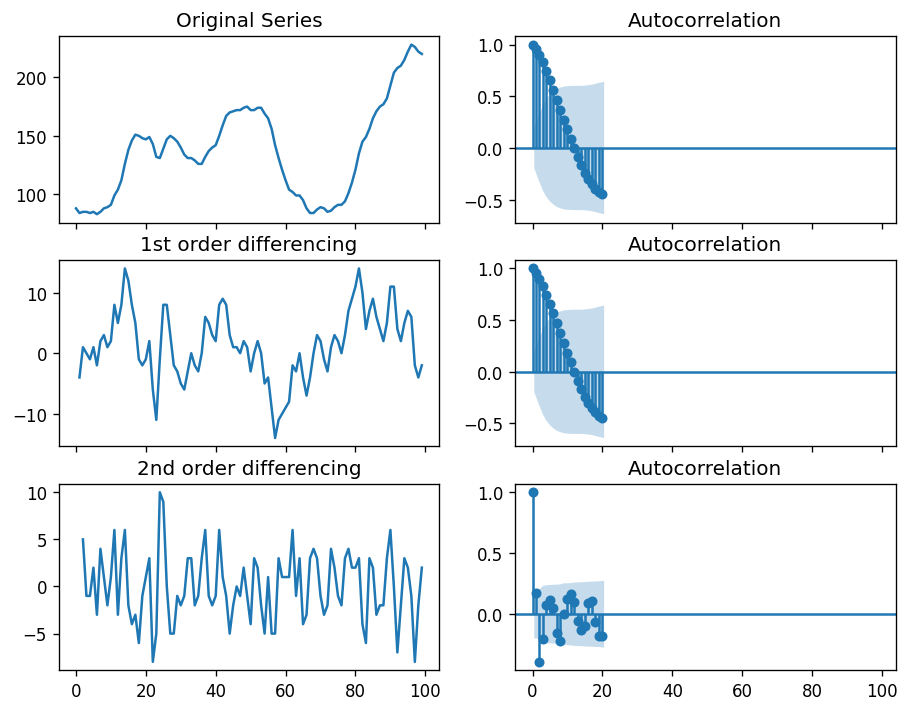

In [ ]:
#Original Series
fig, axes = plt.subplots(3,2, sharex=True)
axes[0,0].plot(df.value)
axes[0,0].set_title('Original Series')

acf0 = plot_acf(df.value, ax=axes[0,1])

#1st order differencing
axes[1,0].plot(df.value.diff())
axes[1,0].set_title('1st order differencing')

acf1 = plot_acf(df.value,ax=axes[1,1])

#2nd order differencing
axes[2,0].plot(df.value.diff().diff());
axes[2,0].set_title('2nd order differencing')

acf2 = plot_acf(df.value.diff().diff().dropna(),ax=axes[2,1])


In [ ]:
result = adfuller(df.value.diff().dropna())
print('1st order differencing : ADF statistic %f' % result[0],end=',')
print('p-value : %f' % result[1])

result = adfuller(df.value.diff().diff().dropna())
print('2nd order differencing : ADF statistics: %f' % result[0],end=',')
print('p-value: %f' % result[1])

1st order differencing : ADF statistic -2.722238,p-value : 0.070268
2nd order differencing : ADF statistics: -9.929762,p-value: 0.000000


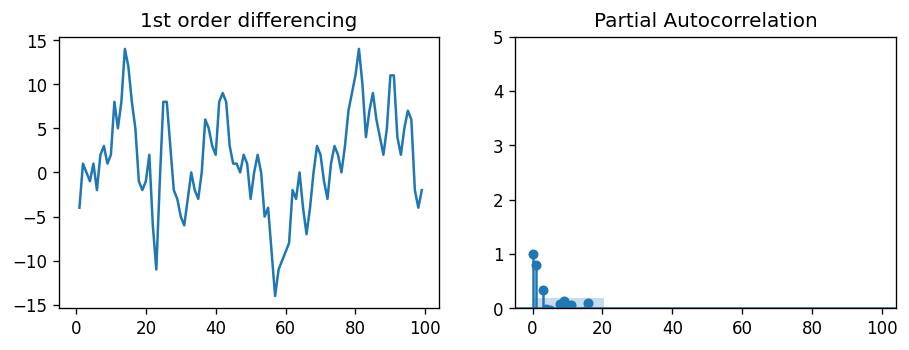

In [ ]:
# Partial autocorrelation plot
plt.rcParams.update({'figure.figsize':(9,3),'figure.dpi':120})
fig, axes = plt.subplots(1,2, sharex=True)
axes[0].plot(df.value.diff());
axes[0].set_title('1st order differencing')
axes[1].set(ylim =(0,5))

pacf = plot_pacf(df.value.diff().dropna(),ax=axes[1])

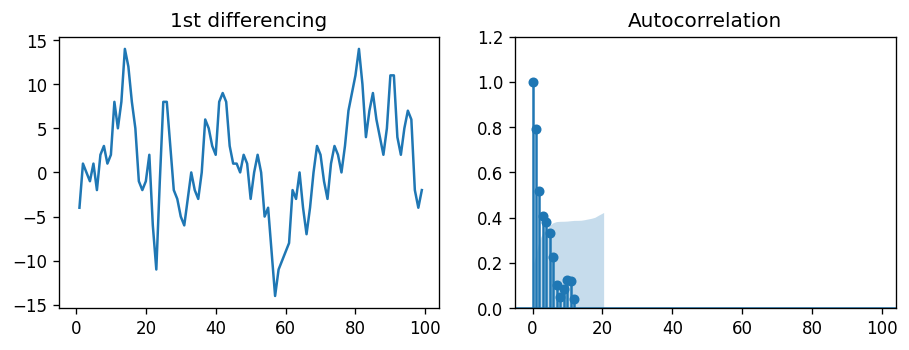

In [ ]:
# order of MA term to remove any autocorrelation in the stationaries series

fig, axes =plt.subplots(1,2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st differencing')
axes[1].set(ylim=(0,1.2))

acf = plot_acf(df.value.diff().dropna(),ax=axes[1])

In [ ]:
# Build Arima Model
austa = pd.read_csv('austa.csv')
austa.head()

,date,value
0,1980-01-01,0.829894
1,1981-01-01,0.859511
2,1982-01-01,0.876689
3,1983-01-01,0.866707
4,1984-01-01,0.932052


In [ ]:
# set date as a index
austa.set_index('date',inplace=True)

In [ ]:
austa.head()

,value
date,
1980-01-01,0.829894
1981-01-01,0.859511
1982-01-01,0.876689
1983-01-01,0.866707
1984-01-01,0.932052


In [ ]:
#check stationarity
result = adfuller(austa.value.dropna())

print('ADF statistic : %f' % result[0])
print('p-value: %f' % result[1])

ADF statistic : -0.358294
p-value: 0.916833


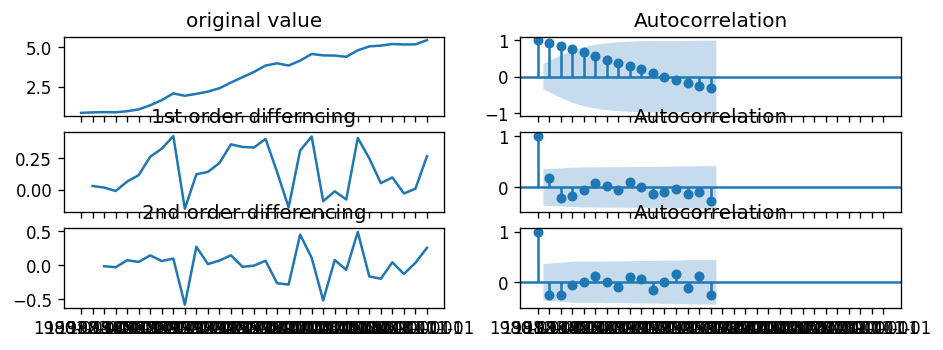

In [ ]:
# deetermine d
#original series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0,0].plot(austa.value)
axes[0,0].set_title('original value')

acf0 = plot_acf(austa.value, ax=axes[0,1])

#1st order differencing
axes[1,0].plot(austa.value.diff())
axes[1,0].set_title('1st order differncing')

acf1 = plot_acf(austa.value.diff().dropna(), ax=axes[1,1])

#2nd order differencing
axes[2,0].plot(austa.value.diff().diff())
axes[2,0].set_title('2nd order differencing')

acf2 = plot_acf(austa.value.diff().diff().dropna(),ax=axes[2,1])

In [ ]:
result = adfuller(austa.value.diff().dropna())
print('1st order diff : ADF statistic:%f'% result[0],end=',')
print('p-value:%f'% result[1])

result = adfuller(austa.value.diff().diff().dropna())
print('2nd order diff : ADF statistic : %f' % result[0],end=',')
print('p-value:%f'% result[1])

1st order diff : ADF statistic:-4.222667,p-value:0.000603
2nd order diff : ADF statistic : -4.446179,p-value:0.000246


In [ ]:
model = ARIMA(austa.value, order=(2,1,1))
model_fit = model.fit(disp=0)

print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                   30
Model:                 ARIMA(2, 1, 1)   Log Likelihood                  10.924
Method:                       css-mle   S.D. of innovations              0.168
Date:                Wed, 31 Mar 2021   AIC                            -11.848
Time:                        19:07:15   BIC                             -4.842
Sample:                    01-01-1981   HQIC                            -9.607
                         - 01-01-2010                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1588      0.027      5.907      0.000       0.106       0.212
ar.L1.D.value     0.5871      0.560      1.049      0.294      -0.510       1.684
ar.L2.D.value    -0.3156      0.185     

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
